In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/spam.csv' , encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(columns = ['Unnamed: 2' , 'Unnamed: 3'	, 'Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<ipython-input-33-8ee8069e1eb6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


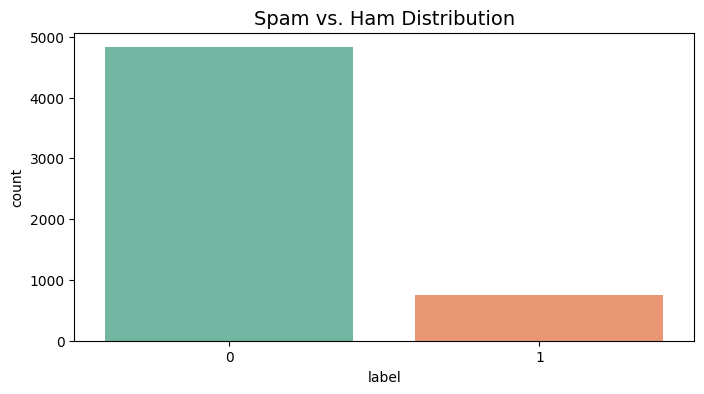

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title("Spam vs. Ham Distribution", fontsize=14)
plt.show()

In [ ]:
encoder = LabelEncoder()

df['v1'] = encoder.fit_transform(df['v1'])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df = df[['v1' , 'v2']].rename(columns = {'v1':'label' , 'v2':'text'})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])

In [ ]:
x = X
y = df['label']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

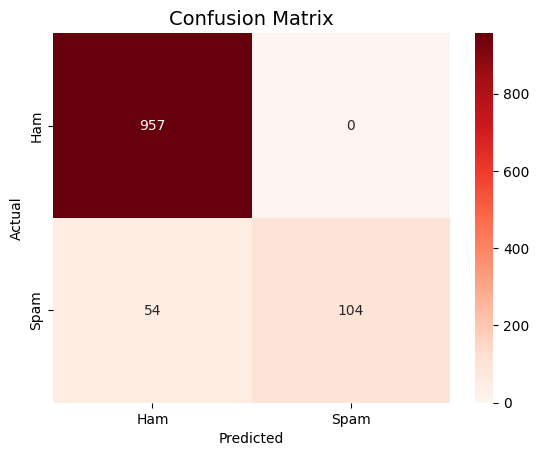

Logistic Regression : 0.9515695067264573


In [ ]:
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontsize=14)
plt.show()

print(f'Logistic Regression :' , accuracy_score(y_test, y_pred))

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(x_train , y_train)

DecisionTreeClassifier()

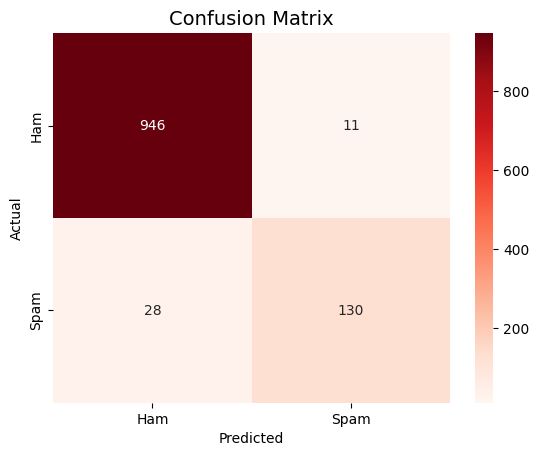

Decision Tree : 0.9650224215246637


In [ ]:
y_pred1 = model1.predict(x_test)

cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontsize=14)
plt.show()

print(f'Decision Tree :' , accuracy_score(y_test, y_pred1))

In [ ]:
model2 = RandomForestClassifier()
model2.fit(x_train , y_train)

RandomForestClassifier()

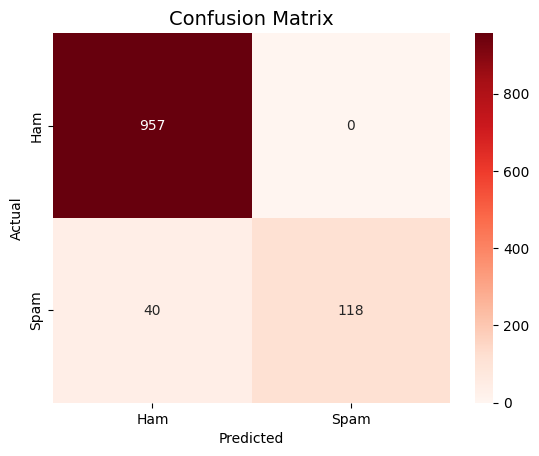

Random Forest : 0.9641255605381166


In [ ]:
y_pred2 = model2.predict(x_test)

cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontsize=14)
plt.show()

print(f'Random Forest :' , accuracy_score(y_test, y_pred2))